<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Inverted_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-11c9f454c90c>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=-45,cmap='viridis',anpha=0.3)
<ipython-input-3-11c9f454c90c>:79: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=55,cmap='viridis',anpha=0.3)
<ipython-input-3-11c9f454c90c>:80: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=55,cmap='viridis',anpha=0.3)


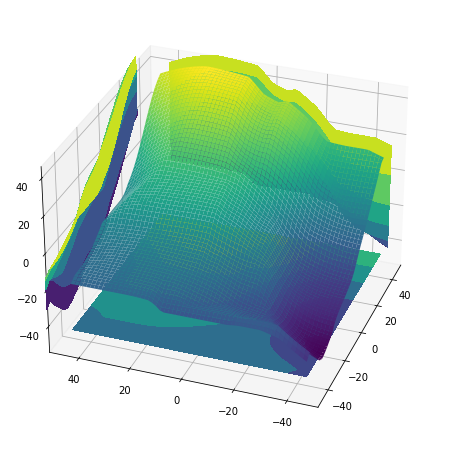

In [3]:
#Control Inverted Pendulum
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math

alpha = ctrl.Antecedent(np.linspace(-90, 90, 61), 'alpha')
trend = ctrl.Antecedent(np.linspace(-45, 45, 61), 'trend')
force = ctrl.Consequent(np.linspace(-100, 100, 61), 'force')
#------------------#
alpha['LN'] = fuzz.gaussmf(alpha.universe,-90, 30)
alpha['N'] = fuzz.gaussmf(alpha.universe, -10, 20)
alpha['ZE'] = fuzz.gaussmf(alpha.universe, 0, 10)
alpha['P'] = fuzz.gaussmf(alpha.universe, 30, 30)
alpha['LP'] = fuzz.gaussmf(alpha.universe, 80, 20)
#------------------#
trend['-2'] = fuzz.gaussmf(trend.universe,-45, 30)
trend['-1'] = fuzz.gaussmf(trend.universe, -5, 10)
trend['0'] = fuzz.gaussmf(trend.universe, 0, 5)
trend['1'] = fuzz.gaussmf(trend.universe, 15, 20)
trend['2'] = fuzz.gaussmf(trend.universe, 40, 45)
#------------------#
force['LN'] = fuzz.gaussmf(force.universe,-100, 30)
force['N'] = fuzz.gaussmf(force.universe, -30, 30)
force['ZE'] = fuzz.gaussmf(force.universe, 0, 20)
force['P'] = fuzz.gaussmf(force.universe, 30, 25)
force['LP'] = fuzz.gaussmf(force.universe, 80, 30)

rule_1 = ctrl.Rule(alpha['LN'] & trend['-2'], force['LN'])
rule_2 = ctrl.Rule(alpha['LN'] & trend['-1'], force['LN'])
rule_3 = ctrl.Rule(alpha['LN'] & trend['0'], force['N'])
rule_4 = ctrl.Rule(alpha['LN'] & trend['1'], force['N'])
rule_5 = ctrl.Rule(alpha['LN'] & trend['2'], force['ZE'])

rule_6 = ctrl.Rule(alpha['N'] & trend['-2'], force['LN'])
rule_7 = ctrl.Rule(alpha['N'] & trend['-1'], force['N'])
rule_8 = ctrl.Rule(alpha['N'] & trend['0'], force['ZE'])
rule_9 = ctrl.Rule(alpha['N'] & trend['1'], force['ZE'])
rule_10 = ctrl.Rule(alpha['N'] & trend['2'], force['N'])

rule_11 = ctrl.Rule(alpha['ZE'] & trend['-2'], force['N'])
rule_12 = ctrl.Rule(alpha['ZE'] & trend['-1'], force['N'])
rule_13 = ctrl.Rule(alpha['ZE'] & trend['0'], force['ZE'])
rule_14 = ctrl.Rule(alpha['ZE'] & trend['1'], force['P'])
rule_15 = ctrl.Rule(alpha['ZE'] & trend['2'], force['N'])

rule_16 = ctrl.Rule(alpha['P'] & trend['-2'], force['ZE'])
rule_17 = ctrl.Rule(alpha['P'] & trend['-1'], force['P'])
rule_18 = ctrl.Rule(alpha['P'] & trend['0'], force['ZE'])
rule_19 = ctrl.Rule(alpha['P'] & trend['1'], force['P'])
rule_20 = ctrl.Rule(alpha['P'] & trend['1'], force['LP'])

rule_21 = ctrl.Rule(alpha['LP'] & trend['-2'], force['ZE'])
rule_22 = ctrl.Rule(alpha['LP'] & trend['-1'], force['P'])
rule_23 = ctrl.Rule(alpha['LP'] & trend['0'], force['ZE'])
rule_24 = ctrl.Rule(alpha['LP'] & trend['1'], force['P'])
rule_25 = ctrl.Rule(alpha['LP'] & trend['2'], force['LP'])



rules = [rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10, rule_11, rule_12, rule_13, rule_14, rule_15, rule_16, rule_17, rule_18, rule_19, rule_20, rule_21, rule_22, rule_23, rule_24, rule_25]
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)
upsampled = np.linspace(-45,45,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['alpha']= x[i,j]
    sim.input['trend']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['force']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4)
cset = ax.contourf(x,y,z,zdir='z',offset=-45,cmap='viridis',anpha=0.3)
cset = ax.contourf(x,y,z,zdir='x',offset=55,cmap='viridis',anpha=0.3)
cset = ax.contourf(x,y,z,zdir='y',offset=55,cmap='viridis',anpha=0.3)
ax.view_init(30,200)